Week 1 : Day 1 -> Choose a dataset from online sources like kaggle
                Dataset choosen : https://www.kaggle.com/datasets/rahulchavan99/marketing-campaign-dataset

Week 1 : Day 2 -> Explore the Dataset and compute basic statistics

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import IPython.display as display
import seaborn as sns
# import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [2]:
# Displaying Maximum rows and columns

# Display all columns of the dataframe
pd.options.display.max_columns=None

# Display all rows of the dataframe
pd.options.display.max_rows=None

# Set the plot size
plt.rcParams['figure.figsize']=[14,6]

In [3]:
# Read the Dataset from the specified file, loading the file through GitHub
url = 'https://raw.githubusercontent.com/AnubhavBhatnagar27/Ads-Click-Through-Rate-ML_Model/main/Marketing%20campaign%20dataset.csv'
df = pd.read_csv(url)
df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,landing_page,advertiser_id,advertiser_name,network_id,approved_budget,advertiser_currency,channel_id,channel_name,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,stats_currency,currency_code,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,01-05-2022,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0,652.173913,837,8,SGD,SGD,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,02-05-2022,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,Web,190,400.0,SGD,8,Social,NaN,0,652.173913,2634,44,SGD,SGD,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,03-05-2022,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,8,Social,NaN,0,652.173913,2135,32,SGD,SGD,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,04-05-2022,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,Web,190,400.0,SGD,64,Video,NaN,0,652.173913,2327,48,SGD,SGD,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,05-05-2022,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0,652.173913,1538,20,SGD,SGD,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [4]:
# Reading the Indices and types for each column in the Dataset
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [5]:
# Reading the shape i.e. number of rows and columns
df.shape

(72612, 35)

In [6]:
# Summary Statistics(mean ,median, std, min, max)
df.describe()

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,channel_id,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach
count,72612.000000,72612.000000,72612.000000,72612.000000,69200.000000,69200.000000,69200.000000,72612.000000,72612.000000,7.220600e+04,72612.000000,7406.0,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000,0.0,0.0,0.0
mean,3130.143282,27.036344,49.449127,7450.124842,267.810694,223.175578,83.082659,6195.862213,345.272861,1.258064e+05,21.847780,1.0,0.0,617.630284,1370.161847,52.696386,1.0,11.819999,NaN,NaN,NaN
std,142.154918,25.479175,55.881324,4062.384982,92.848075,77.373396,20.847618,387.864576,23.707191,5.626204e+05,23.759286,0.0,0.0,1354.606620,3702.699962,377.308103,0.0,48.370659,NaN,NaN,NaN
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,23.000000,4756.000000,188.000000,4.000000e+02,1.000000,1.0,0.0,2.452316,511.000000,2.000000,1.0,0.000000,NaN,NaN,NaN
25%,3148.000000,9.000000,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,4.000000,1.0,0.0,205.994550,526.000000,5.000000,1.0,0.435791,NaN,NaN,NaN
50%,3173.000000,19.000000,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,8.000000,1.0,0.0,377.656676,577.000000,8.000000,1.0,1.709001,NaN,NaN,NaN
75%,3202.000000,37.000000,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,32.000000,1.0,0.0,755.313351,816.000000,13.000000,1.0,8.276369,NaN,NaN,NaN
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,64.000000,1.0,0.0,39559.896160,153959.000000,31807.000000,1.0,2295.028945,NaN,NaN,NaN


Week 1 : Day 3 -> Perform EDA with visualizations to analyze patterns

In [7]:
# Declaring the CTR
df['CTR'] = df['clicks']/df['impressions']

In [8]:
# Converting 'time' column to datetime
df['time'] = pd.to_datetime(df['time'],format='%d-%m-%Y',errors='coerce')

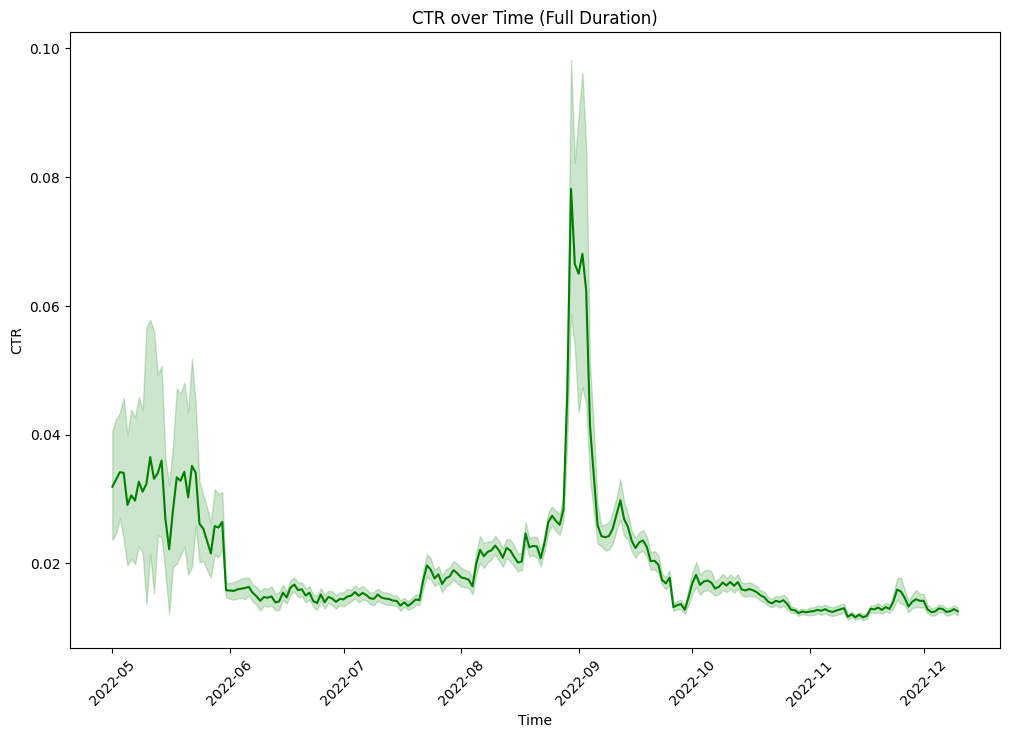

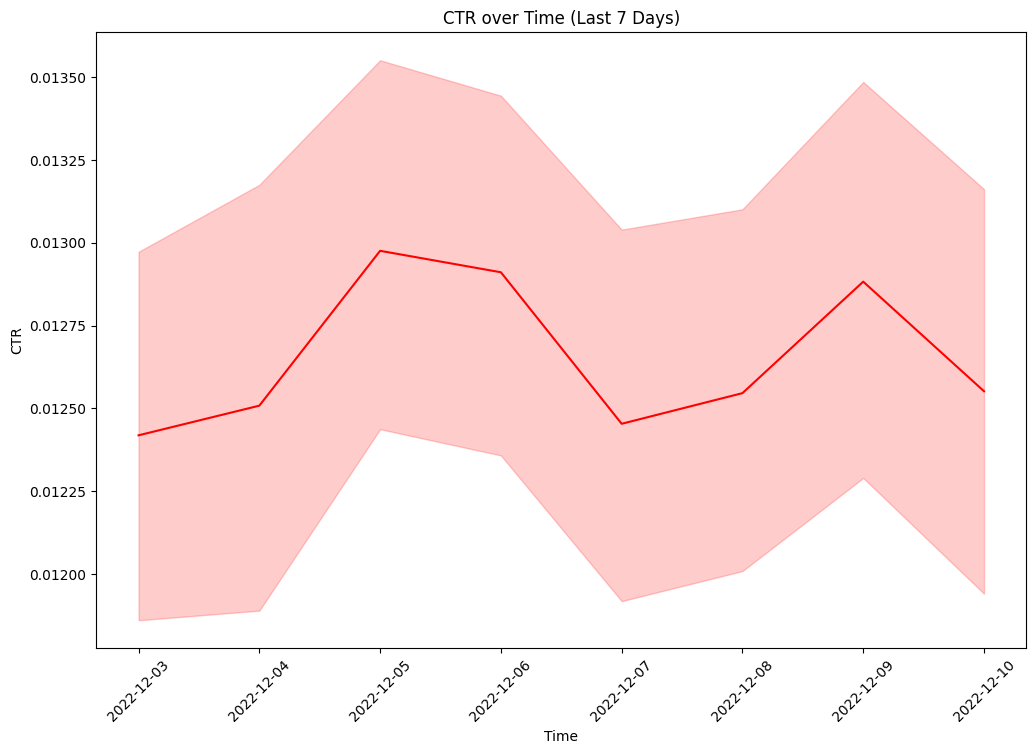

In [9]:
# Visualizing the CTR VS Time Duration

# CTR over full duration
plt.figure(figsize=(12, 8))
sns.lineplot(x='time', y='CTR', data=df, color='green')
plt.title('CTR over Time (Full Duration)')
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.show()
# Adding Space between the plots
print('\n' * 4)


# CTR over last 7 days
last_7_days = pd.to_datetime(df['time'].max()) - pd.DateOffset(days=7)
df_last_7_days = df[df['time'] >= last_7_days]

plt.figure(figsize=(12, 8))
sns.lineplot(x='time', y='CTR', data=df_last_7_days, color='red')
plt.title('CTR over Time (Last 7 Days)')
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=45)

plt.show()

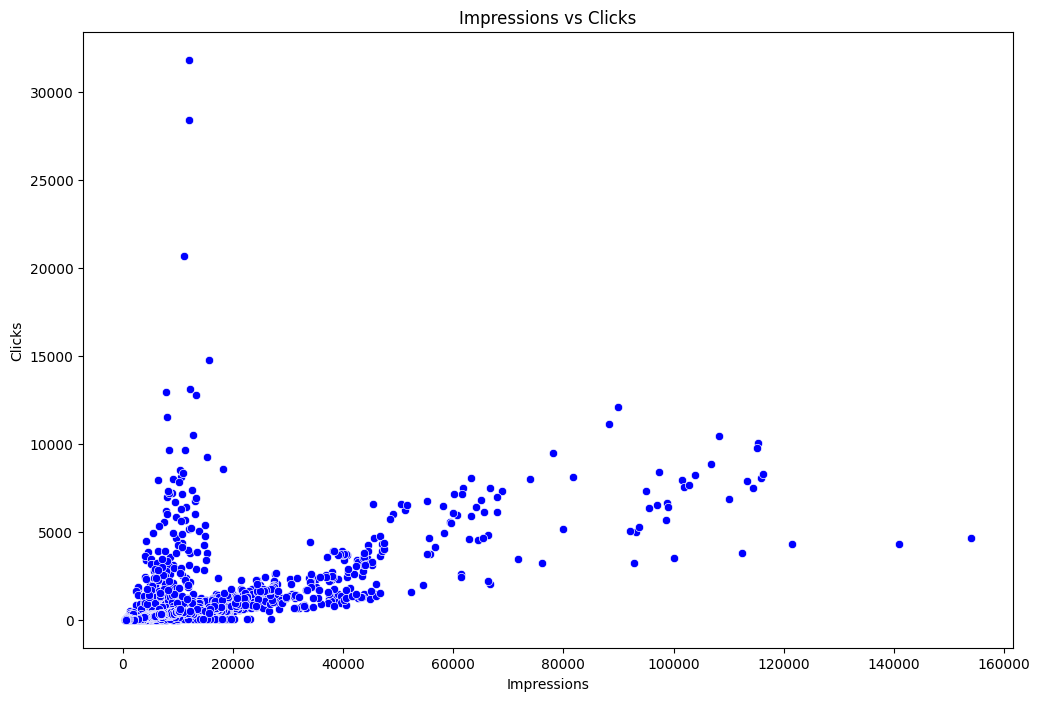




Correlation between Impressions and Clicks is: 

             impressions    clicks
impressions     1.000000  0.661729
clicks          0.661729  1.000000


In [10]:
# Scatter plot to visualize relationship between impressions and clicks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='impressions', y='clicks', data=df, color='blue')
plt.title('Impressions vs Clicks')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.show()

print('\n'*2) #Adding Spaces

# Correlation between impressions and clicks
correlation = df[['impressions', 'clicks']].corr()  #Using this correlation, later in the code as well
print("Correlation between Impressions and Clicks is: \n")
print(correlation)


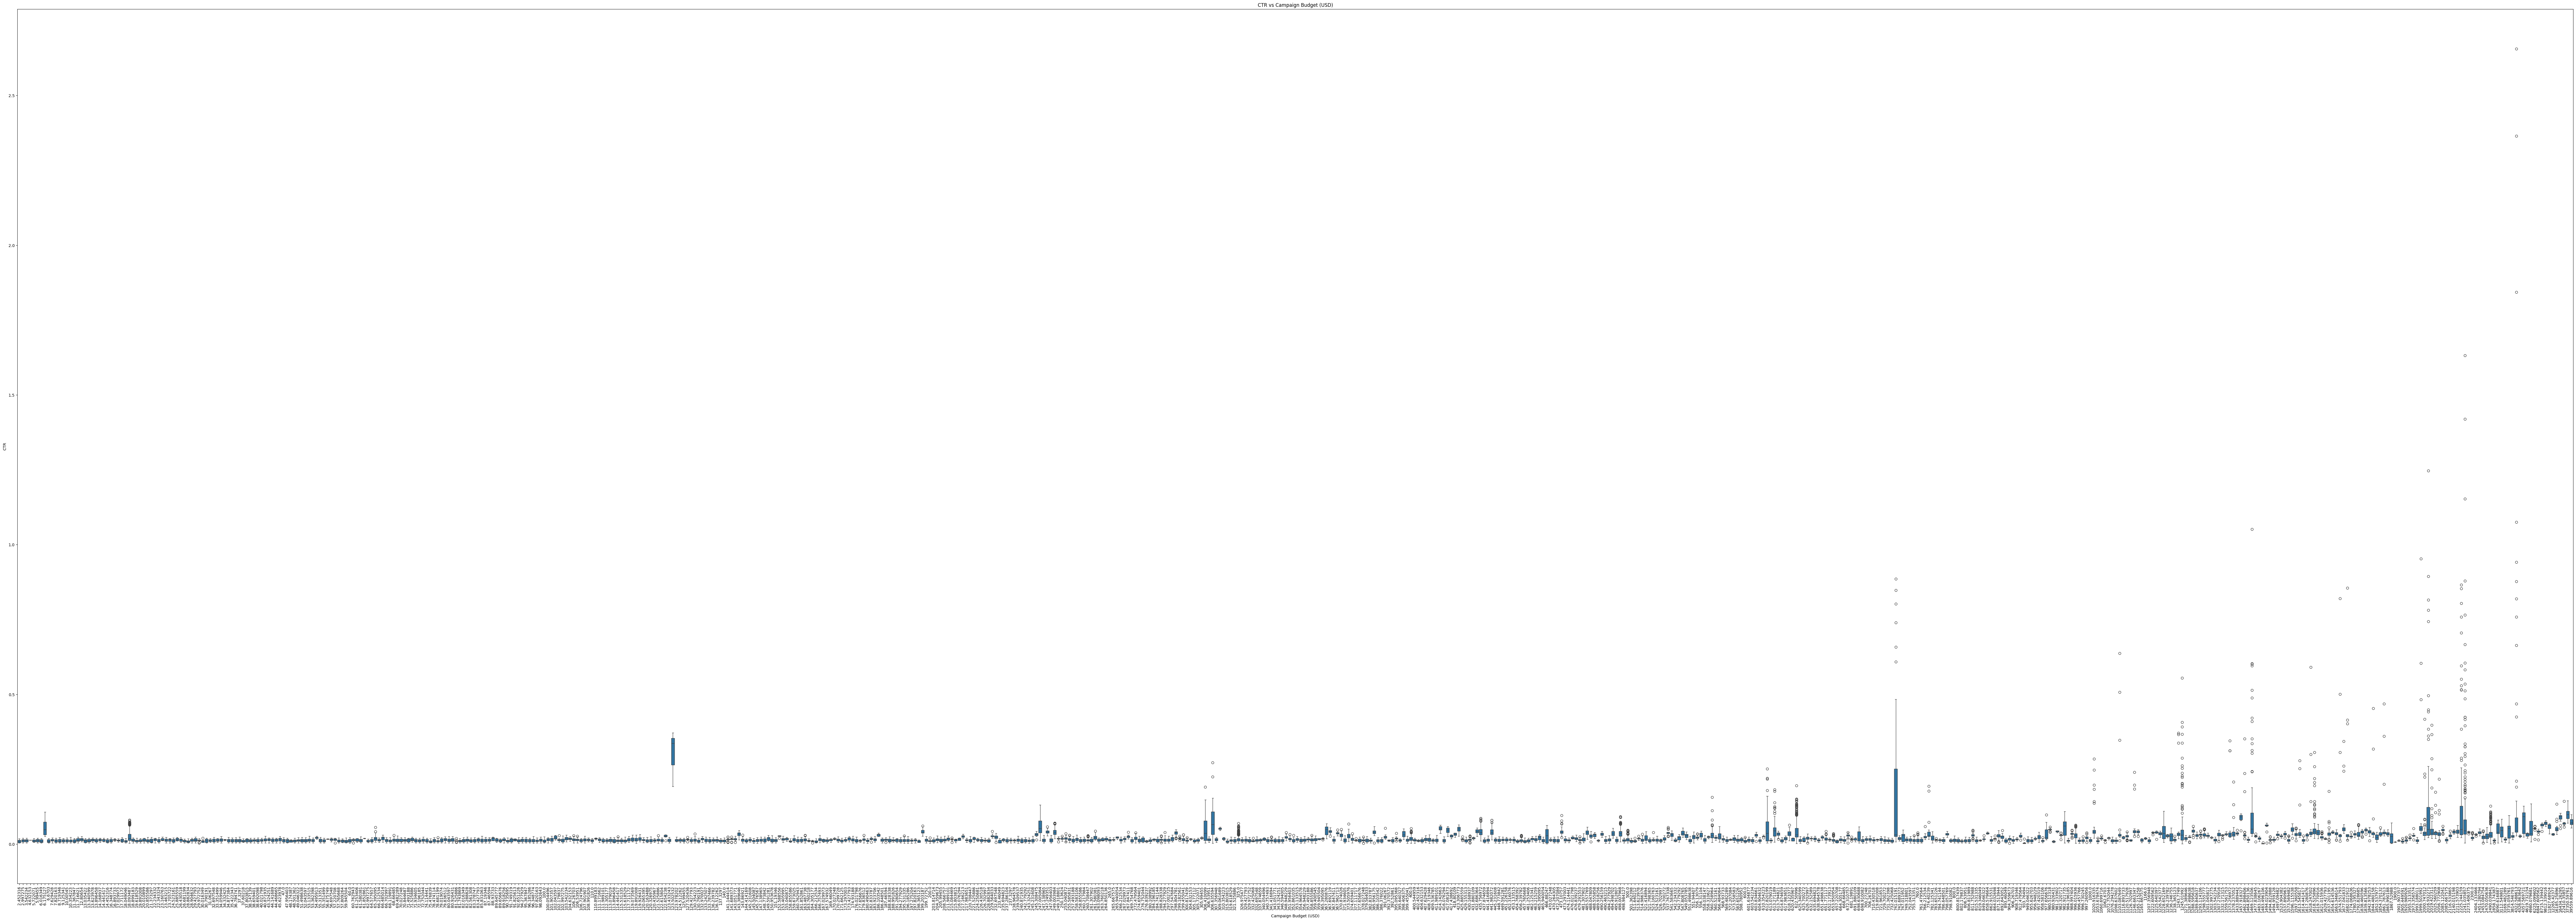

In [11]:
# Boxplot to show CTR distribution across different budget ranges
plt.figure(figsize=(100,40))
sns.boxplot(x='campaign_budget_usd', y='CTR', data=df)
plt.title('CTR vs Campaign Budget (USD)')
plt.xlabel('Campaign Budget (USD)')
plt.ylabel('CTR')
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.05, right=0.95) #Adjusting Margins for better Spacing
plt.show()

# Click on the figure to see the boxplot graph clearly

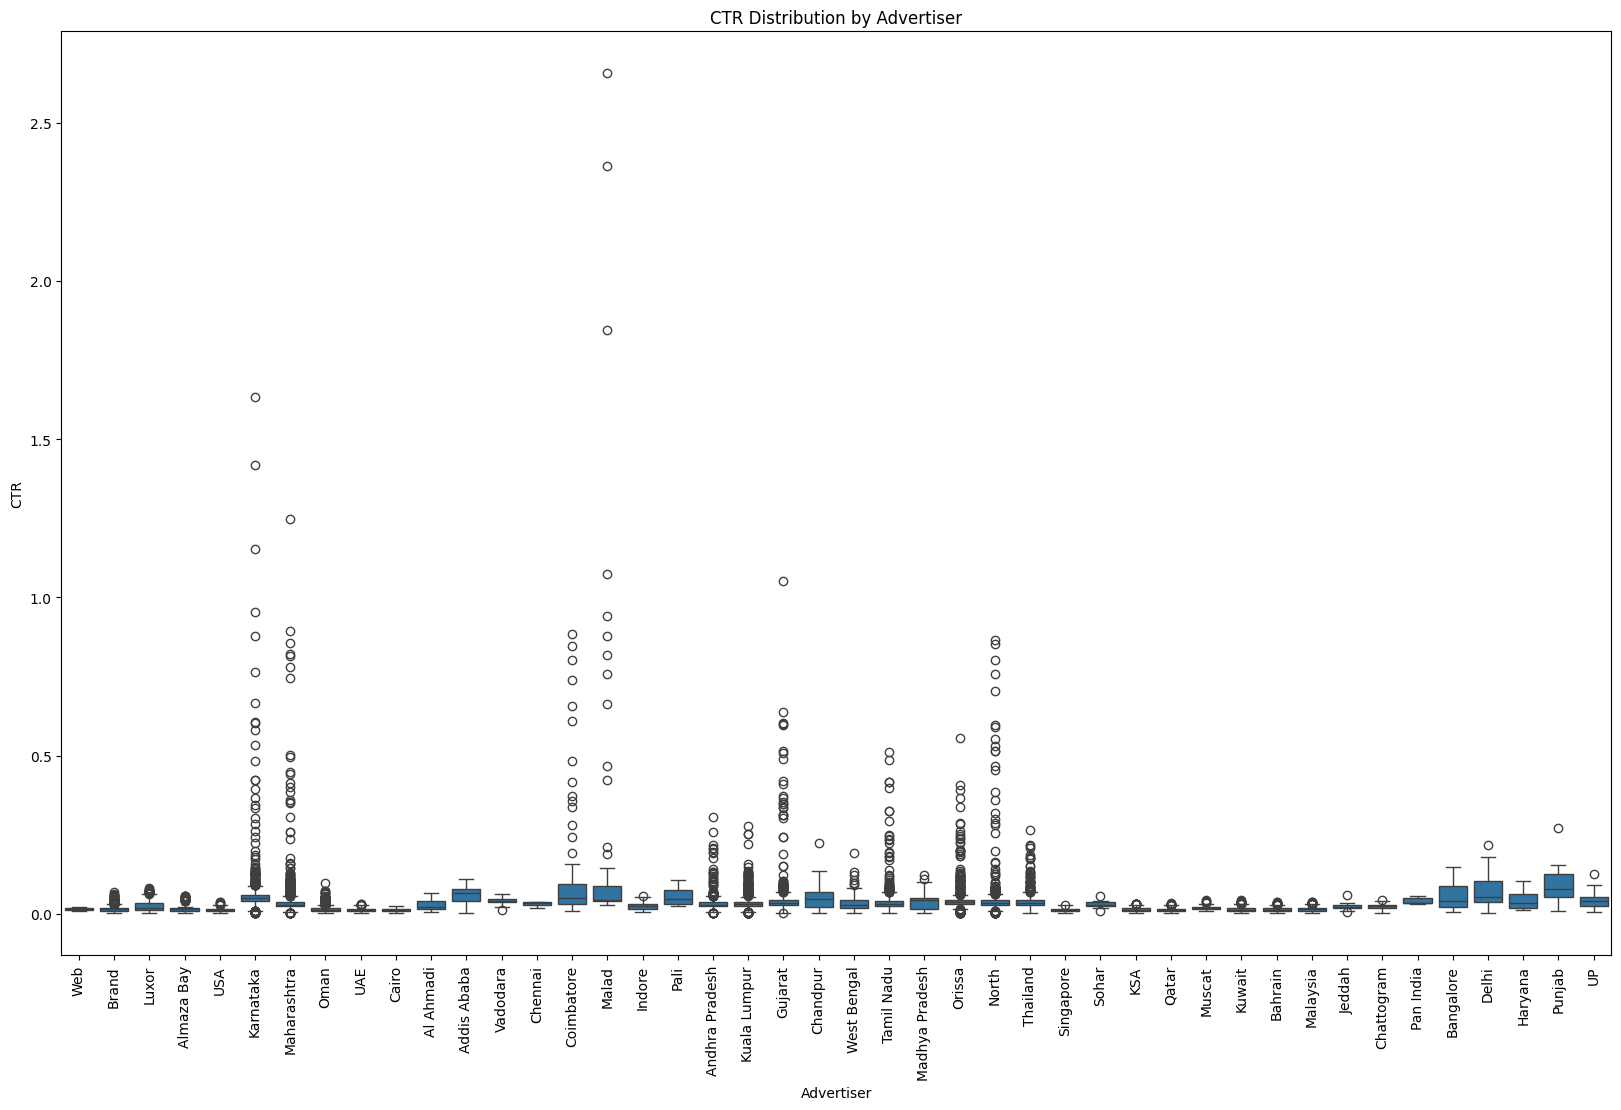

In [12]:
# Boxplot of CTR across different advertisers
plt.figure(figsize=(20, 12))
sns.boxplot(x='advertiser_name', y='CTR', data=df)
plt.title('CTR Distribution by Advertiser')
plt.xlabel('Advertiser')
plt.ylabel('CTR')
plt.xticks(rotation=90)
plt.show()


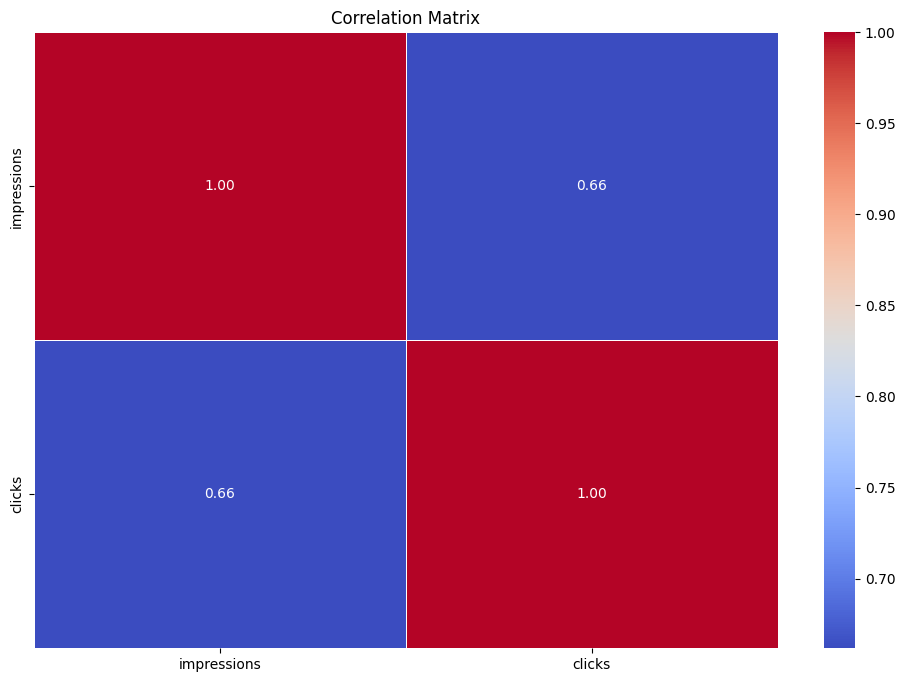

In [13]:
# Plotting the HeatMap for Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

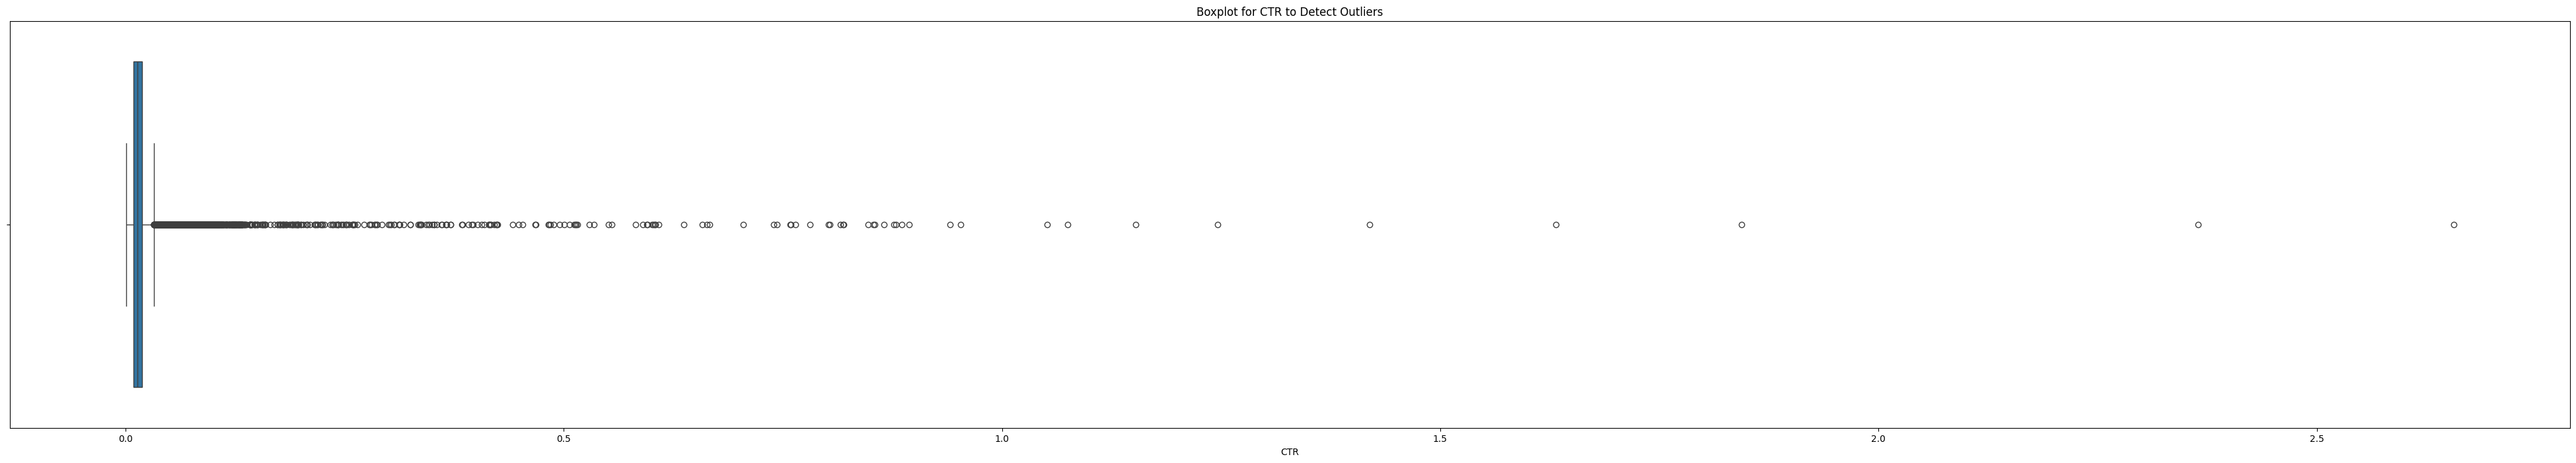

In [14]:
# Boxplot to detect outliers in CTR
plt.figure(figsize=(50, 8))
sns.boxplot(x='CTR', data=df)
plt.title('Boxplot for CTR to Detect Outliers')
plt.show()

# Click on the figure to see the boxplot graph clearly

Week 1 : Day 4 -> Handle Missing values and address outliers

In [15]:
# Identifying Missing Values : Checking for missing values in each column
total_missing=df.isnull().sum()

# Calculate the percentage of missing values for each variable
percent_missing=(total_missing*100)/df.isnull().count()

# Round off
percent_missing=percent_missing.round(decimals=0)

# Create a dataframe for all missing values
missing_data=pd.DataFrame({'Total':total_missing,
                           'Percentage':percent_missing,
                           'Type':df.dtypes})

# Sort the Dataframe based on the total count of missing values in descending order
missing_data=missing_data.sort_values(by='Total',ascending=False)

missing_data

,Total,Percentage,Type
total_reach,72612,100.0,float64
unique_reach,72612,100.0,float64
position_in_content,72612,100.0,float64
max_bid_cpm,65206,90.0,float64
creative_width,3412,5.0,float64
creative_height,3412,5.0,float64
template_id,3412,5.0,float64
approved_budget,406,1.0,float64
timezone,0,0.0,object
cmi_currency_code,0,0.0,object


In [16]:
# filling missing values with 0 for following columns

df['creative_width'].fillna(0, inplace=True)
df['creative_height'].fillna(0, inplace=True)
df['template_id'].fillna(0, inplace=True)
df['approved_budget'].fillna(0, inplace=True)

# dropping where more than 80% values are missing
df.drop(columns=['position_in_content','unique_reach','total_reach','max_bid_cpm'],inplace=True)

df.describe()

,campaign_item_id,no_of_days,time,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,channel_id,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,CTR
count,72612.000000,72612.000000,72612,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,7.261200e+04,72612.000000,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000,72612.000000
mean,3130.143282,27.036344,2022-09-26 18:40:05.949429760,49.449127,7450.124842,255.226409,212.688674,79.178648,6195.862213,345.272861,1.251030e+05,21.847780,0.0,617.630284,1370.161847,52.696386,1.0,11.819999,0.017450
min,2733.000000,0.000000,2022-05-01 00:00:00,4.000000,1000.000000,0.000000,0.000000,0.000000,4756.000000,188.000000,0.000000e+00,1.000000,0.0,2.452316,511.000000,2.000000,1.0,0.000000,0.000887
25%,3148.000000,9.000000,2022-08-20 00:00:00,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,4.000000,0.0,205.994550,526.000000,5.000000,1.0,0.435791,0.009365
50%,3173.000000,19.000000,2022-10-11 00:00:00,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,8.000000,0.0,377.656676,577.000000,8.000000,1.0,1.709001,0.013720
75%,3202.000000,37.000000,2022-11-05 00:00:00,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,32.000000,0.0,755.313351,816.000000,13.000000,1.0,8.276369,0.018762
max,3960.000000,118.000000,2022-12-10 00:00:00,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,64.000000,0.0,39559.896160,153959.000000,31807.000000,1.0,2295.028945,2.656117
std,142.154918,25.479175,NaN,55.881324,4062.384982,106.899767,89.083139,26.894586,387.864576,23.707191,5.611237e+05,23.759286,0.0,1354.606620,3702.699962,377.308103,0.0,48.370659,0.030918


Week 1 : Day 5 -> Clean the dataset and prepare for feature engineering

In [17]:
# Checking for any duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [18]:
# Convert columns to appropriate data types
df['CTR'] = pd.to_numeric(df['CTR'], errors='coerce')
df['campaign_budget_usd'] = pd.to_numeric(df['campaign_budget_usd'], errors='coerce')

# Convert time-based columns to datetime format
df['time'] = pd.to_datetime(df['time'],format='%d-%m-%Y',errors='coerce')  # If 'time' is present and in string format


Week 2 : Day 1 -> Encode Categorical Features(eg - one hot encoding)

Categorical variables should be properly encoded for machine learning. You can either use label encoding or one-hot encoding depending on the model you plan to use.

In [19]:
# One-hot encoding for categorical columns like 'network_id', 'advertiser_name', etc.
# df.columns = df.columns.str.strip()
# print(df.columns)
# df = pd.get_dummies(df, columns=['network_id', 'advertiser_name', 'campaign_item_id'], drop_first=True)
# print(list(df.columns))

Week 2 : Day 2 -> Scale/Normalize numerical features and generate interaction terms

In [20]:
# Standardize features
scaler = StandardScaler()
df[['impressions', 'clicks']] = scaler.fit_transform(df[['impressions', 'clicks']])

Week 2 : Day 3 -> Split Data into training and testing sets

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

categorical_columns

['ext_service_name',
 'search_tags',
 'landing_page',
 'advertiser_name',
 'advertiser_currency',
 'channel_name',
 'stats_currency',
 'currency_code',
 'search_tag_cat',
 'cmi_currency_code',
 'timezone',
 'weekday_cat',
 'keywords']

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# List of Categorical Features
categorical_features = ['ext_service_name', 'search_tags', 'landing_page', 'advertiser_currency',
                        'channel_name', 'stats_currency', 'currency_code', 'search_tag_cat',
                        'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords', 'advertiser_name']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for a dense output

# Fit and transform the categorical columns in the entire dataframe
encoded_data = encoder.fit_transform(df[categorical_features])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded DataFrame with the original DataFrame (dropping the original categorical columns)
df = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

# Fixing Time format error (Extract Year, Month, Day)
if 'time' in df.columns:
    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df = df.drop(columns=['time'])  # Drop the original time column

# Now, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['CTR']), df['CTR'], test_size=0.2, random_state=42)

# Replace all hyphens with underscores in the column names of X_train and X_test
X_train.columns = X_train.columns.str.replace('-', '_')
X_test.columns = X_test.columns.str.replace('-', '_')

# Replace '://' with underscores and remove other special characters (to make them safe)
X_train.columns = X_train.columns.str.replace('://', '_').str.replace('[^a-zA-Z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace('://', '_').str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# Remove extra spaces and underscores to ensure consistency
X_train.columns = X_train.columns.str.replace(' ', '_').str.replace('__', '_').str.lower()
X_test.columns = X_test.columns.str.replace(' ', '_').str.replace('__', '_').str.lower()

# Align the columns of X_train and X_test to make sure they have the same features after one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Find missing columns in X_test
missing_cols = set(X_train.columns) - set(X_test.columns)
if missing_cols:
    print(f"Missing columns in X_test: {missing_cols}")
    # Add missing columns in X_test with 0s
    for col in missing_cols:
        X_test[col] = 0

# Find extra columns in X_test (if any)
extra_cols = set(X_test.columns) - set(X_train.columns)
if extra_cols:
    print(f"Extra columns in X_test: {extra_cols}")
    # Add missing columns in X_train with 0s if needed
    for col in extra_cols:
        X_train[col] = 0

# Align columns again to ensure they appear in the same order
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Verify the split and check data shapes
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Training set size: 58089 rows
Testing set size: 14523 rows
X_train shape: (58089, 275)
X_test shape: (14523, 275)
y_train shape: (58089,)
y_test shape: (14523,)


Week 2 : Day 4 -> Train a basic model and evaluate using MSE

Model Training with Linear Regression

In [23]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0002036558569741128


Week 2 : Day 5 -> Mid Evaluation - Present the cleaned dataset, feature engineering, and initial model performance

Week 3 : Day 1 -> Train Advanced models (EG: decision tree, random forest)

In [24]:
# Initialize the DecisionTree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model using Mean Squared Error and R²
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R² Score: {r2_dt}")

Decision Tree Mean Squared Error: 6.259601441943271e-05
Decision Tree R² Score: 0.934578100786109


In [25]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50,max_depth=10,n_jobs=-1,max_features='sqrt',random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error and R²
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")
# Get feature importance from Random Forest model
importances_rf = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rf})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importances.head())

Random Forest Mean Squared Error: 0.00040066396321455374
Random Forest R² Score: 0.5812481407454724
               Feature  Importance
14              clicks    0.245519
274                day    0.085376
16      media_cost_usd    0.058668
13         impressions    0.056971
88   currency_code_inr    0.041234


Week 3 : Day 2 -> Introduce and train XGBoost or LightGBM models.

In [26]:
# Create the DMatrix objects for XGBoost
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task (MSE loss)
    'eval_metric': 'rmse',            # Root mean square error (RMSE) as eval metric
    'max_depth': 6,                   # Max depth of each tree
    'learning_rate': 0.1,             # Learning rate
    'colsample_bytree': 0.8,          # Fraction of features to use
    'subsample': 0.8                  # Fraction of samples to use
}

# List of evaluation data
evals = [(train_data, 'train'), (test_data, 'eval')]

# Train the model with early stopping
bst = xgb.train(
    params,
    train_data,
    num_boost_round=1000,          # Maximum boosting rounds
    evals=evals,
    early_stopping_rounds=10       # Stop early if no improvement for 10 rounds
)

# Make predictions
y_pred_xgb = bst.predict(test_data)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation results
print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")


[0]	train-rmse:0.02844	eval-rmse:0.02833
[1]	train-rmse:0.02709	eval-rmse:0.02722
[2]	train-rmse:0.02514	eval-rmse:0.02528
[3]	train-rmse:0.02404	eval-rmse:0.02452
[4]	train-rmse:0.02223	eval-rmse:0.02270
[5]	train-rmse:0.02055	eval-rmse:0.02113
[6]	train-rmse:0.01940	eval-rmse:0.01999
[7]	train-rmse:0.01822	eval-rmse:0.01911
[8]	train-rmse:0.01716	eval-rmse:0.01828
[9]	train-rmse:0.01602	eval-rmse:0.01740
[10]	train-rmse:0.01498	eval-rmse:0.01663
[11]	train-rmse:0.01430	eval-rmse:0.01609
[12]	train-rmse:0.01368	eval-rmse:0.01604
[13]	train-rmse:0.01336	eval-rmse:0.01591
[14]	train-rmse:0.01255	eval-rmse:0.01554
[15]	train-rmse:0.01184	eval-rmse:0.01527
[16]	train-rmse:0.01113	eval-rmse:0.01506
[17]	train-rmse:0.01055	eval-rmse:0.01496
[18]	train-rmse:0.01011	eval-rmse:0.01475
[19]	train-rmse:0.00962	eval-rmse:0.01475
[20]	train-rmse:0.00917	eval-rmse:0.01474
[21]	train-rmse:0.00885	eval-rmse:0.01493
[22]	train-rmse:0.00854	eval-rmse:0.01486
[23]	train-rmse:0.00830	eval-rmse:0.01490
[2

In [27]:
# Clean column names to remove special characters and spaces
X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^a-zA-Z0-9]', '_', regex=True)

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for LightGBM model
params = {
    'objective': 'regression',    # For regression tasks
    'metric': 'l2',               # Metric for evaluation (L2 loss = MSE)
    'boosting_type': 'gbdt',      # Gradient Boosting Decision Tree
    'num_leaves': 31,             # Number of leaves in one tree
    'learning_rate': 0.1,         # Learning rate
    'feature_fraction': 0.8,      # Fraction of features to use per tree
    'bagging_fraction': 0.8,      # Fraction of samples to use per tree
    'bagging_freq': 5,            # Frequency of bagging
    'verbose': -1                 # Suppress output
}

# Train the model without early stopping and evals_result
lgb_model = lgb.train(
    params,                      # Model parameters
    train_data,                  # Training data
    num_boost_round=1000,        # Max number of boosting rounds
    valid_sets=[test_data],      # Validation set for evaluation
    valid_names=['test']         # Name for the validation dataset (optional)
)

# Check the best iteration from the training process
print(f"Best iteration: {lgb_model.best_iteration}")

# Predict using the best iteration found during training
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print evaluation results
print(f"LightGBM Mean Squared Error: {mse_lgb}")
print(f"LightGBM R² Score: {r2_lgb}")


Best iteration: 0
LightGBM Mean Squared Error: 5.3417626955005924e-05
LightGBM R² Score: 0.9441708447525261


Week 3 : Day 3 -> Evaluate all models using Log Loss and ROC-AUC

In [28]:
# Let's assume a threshold of 0.5 for CTR
threshold = 0.5
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Ensure all models are trained before predicting
linear_model.fit(X_train, y_train_binary)  # Fit Linear Regression
dt_model.fit(X_train, y_train_binary)      # Fit Decision Tree
rf_model.fit(X_train, y_train_binary)      # Fit Random Forest
# bst.fit(X_train, y_train_binary)           # Fit XGBoost model
# lgb_model.fit(X_train, y_train_binary)     # Fit LightGBM model

# Function to calculate Log Loss and ROC-AUC
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # For linear regression, we need to manually apply sigmoid
    if isinstance(model, (LinearRegression, DecisionTreeRegressor, RandomForestRegressor)):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_train_pred_proba = 1 / (1 + np.exp(-y_train_pred))  # Sigmoid function
        y_test_pred_proba = 1 / (1 + np.exp(-y_test_pred))    # Sigmoid function
    elif isinstance(model, xgb.Booster):  # For XGBoost model
      # For XGBoost, use `predict` with output_margin=False to get probabilities
      X_train_dmatrix = xgb.DMatrix(X_train)
      X_test_dmatrix = xgb.DMatrix(X_test)
      y_train_pred_proba = model.predict(X_train_dmatrix, output_margin=False)
      y_test_pred_proba = model.predict(X_test_dmatrix, output_margin=False)
    elif isinstance(model, lgb.Booster):  # For LightGBM model
      # For LightGBM, use `predict` with raw=False to get probabilities
      y_train_pred_proba = model.predict(X_train, raw=False)
      y_test_pred_proba = model.predict(X_test, raw=False)
    else:
      # For classification models (like Logistic Regression, etc.), use `predict_proba` to get predicted probabilities
      y_train_pred_proba = model.predict_proba(X_train)[:, 1]  # Probability of class 1
      y_test_pred_proba = model.predict_proba(X_test)[:, 1]    # Probability of class 1

    # Calculate Log Loss
    logloss_train = log_loss(y_train, y_train_pred_proba)
    logloss_test = log_loss(y_test, y_test_pred_proba)

    # Calculate ROC-AUC
    roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

    return {
        'Log Loss (Train)': logloss_train,
        'Log Loss (Test)': logloss_test,
        'ROC-AUC (Train)': roc_auc_train,
        'ROC-AUC (Test)': roc_auc_test
    }

# List of models to evaluate
models = {
    'Linear Regression': linear_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': bst,
    'LightGBM': lgb_model
}

# Evaluate each model and store results
evaluation_results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluation_results[model_name] = evaluate_model(model, X_train, y_train_binary, X_test, y_test_binary)

# Display results for each model
for model_name, results in evaluation_results.items():
    print(f"\n{model_name}:")
    for metric, value in results.items():
        print(f"{metric}: {value}")

Evaluating Linear Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating LightGBM...

Linear Regression:
Log Loss (Train): 0.6932021640874008
Log Loss (Test): 0.6932419018347753
ROC-AUC (Train): 0.9998392107545035
ROC-AUC (Test): 0.9997300898169205

Decision Tree:
Log Loss (Train): 0.6928725125383277
Log Loss (Test): 0.6928594479686445
ROC-AUC (Train): 1.0
ROC-AUC (Test): 0.9583333333333333

Random Forest:
Log Loss (Train): 0.6931240981588004
Log Loss (Test): 0.6932584566387965
ROC-AUC (Train): 1.0
ROC-AUC (Test): 0.9999655433808834

XGBoost:
Log Loss (Train): 0.0176207858443813
Log Loss (Test): 0.01783687878024484
ROC-AUC (Train): 0.9999442159760523
ROC-AUC (Test): 0.9998162313647119

LightGBM:
Log Loss (Train): 0.017394818462596242
Log Loss (Test): 0.01745481772773271
ROC-AUC (Train): 0.99999630841018
ROC-AUC (Test): 0.9999712861507363


Week 3: Day 4 -> Perform hyperparamter tuning for the best model

In [29]:
# Determining best model
# Evaluate all models
evaluation_results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluation_results[model_name] = evaluate_model(model, X_train, y_train_binary, X_test, y_test_binary)

# Print and compare the results
for model_name, result in evaluation_results.items():
    print(f"{model_name} Test Results:")
    print(f"Log Loss (Test): {result['Log Loss (Test)']}")
    print(f"ROC-AUC (Test): {result['ROC-AUC (Test)']}")
    print('-' * 50)

# Find the best model based on Log Loss and ROC-AUC (Test)
best_logloss_model = min(evaluation_results, key=lambda x: evaluation_results[x]['Log Loss (Test)'])
best_roc_auc_model = max(evaluation_results, key=lambda x: evaluation_results[x]['ROC-AUC (Test)'])

# Output the best models based on each metric
print(f"Best Model based on Log Loss (Test): {best_logloss_model}")
print(f"Best Model based on ROC-AUC (Test): {best_roc_auc_model}")


Evaluating Linear Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating LightGBM...
Linear Regression Test Results:
Log Loss (Test): 0.6932419018347753
ROC-AUC (Test): 0.9997300898169205
--------------------------------------------------
Decision Tree Test Results:
Log Loss (Test): 0.6928594479686445
ROC-AUC (Test): 0.9583333333333333
--------------------------------------------------
Random Forest Test Results:
Log Loss (Test): 0.6932584566387965
ROC-AUC (Test): 0.9999655433808834
--------------------------------------------------
XGBoost Test Results:
Log Loss (Test): 0.01783687878024484
ROC-AUC (Test): 0.9998162313647119
--------------------------------------------------
LightGBM Test Results:
Log Loss (Test): 0.01745481772773271
ROC-AUC (Test): 0.9999712861507363
--------------------------------------------------
Best Model based on Log Loss (Test): LightGBM
Best Model based on ROC-AUC (Test): LightGBM


In [30]:
# Define your parameter grid for LightGBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Track the best parameters and score
best_score = -np.inf
best_params = {}

# Loop over the parameter grid manually
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for subsample in param_grid['subsample']:
                for colsample_bytree in param_grid['colsample_bytree']:

                    # Create the model with current hyperparameters
                    model = lgb.LGBMClassifier(
                        n_estimators=n_estimators,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree
                    )

                    # Fit the model
                    model.fit(X_train, y_train_binary)

                    # Make predictions
                    y_pred_proba = model.predict_proba(X_test)[:, 1]

                    # Calculate ROC-AUC
                    roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
                    print(f"Testing params: {n_estimators}, {learning_rate}, {max_depth}, {subsample}, {colsample_bytree} => ROC-AUC: {roc_auc}")

                    # Check if this model has the best ROC-AUC score
                    if roc_auc > best_score:
                        best_score = roc_auc
                        best_params = {
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'colsample_bytree': colsample_bytree
                        }

# Print best hyperparameters and score
print(f"Best Hyperparameters: {best_params}")
print(f"Best ROC-AUC Score: {best_score}")

Testing params: 50, 0.01, 3, 0.8, 0.8 => ROC-AUC: 0.9999425723014723
Testing params: 50, 0.01, 3, 0.8, 1.0 => ROC-AUC: 0.9997559322812578
Testing params: 50, 0.01, 3, 1.0, 0.8 => ROC-AUC: 0.9999425723014723
Testing params: 50, 0.01, 3, 1.0, 1.0 => ROC-AUC: 0.9997559322812578
Testing params: 50, 0.01, 5, 0.8, 0.8 => ROC-AUC: 0.9999540578411779
Testing params: 50, 0.01, 5, 0.8, 1.0 => ROC-AUC: 0.9998162313647118
Testing params: 50, 0.01, 5, 1.0, 0.8 => ROC-AUC: 0.9999540578411779
Testing params: 50, 0.01, 5, 1.0, 1.0 => ROC-AUC: 0.9998162313647118
Testing params: 50, 0.01, 7, 0.8, 0.8 => ROC-AUC: 0.9999138584522087
Testing params: 50, 0.01, 7, 0.8, 1.0 => ROC-AUC: 0.9998219741345645
Testing params: 50, 0.01, 7, 1.0, 0.8 => ROC-AUC: 0.9999138584522087
Testing params: 50, 0.01, 7, 1.0, 1.0 => ROC-AUC: 0.9998219741345645
Testing params: 50, 0.1, 3, 0.8, 0.8 => ROC-AUC: 0.7524808765763904
Testing params: 50, 0.1, 3, 0.8, 1.0 => ROC-AUC: 0.6753497346840327
Testing params: 50, 0.1, 3, 1.0, 0.8

Training LightGBM model...
Plotting feature importance and selecting top features...


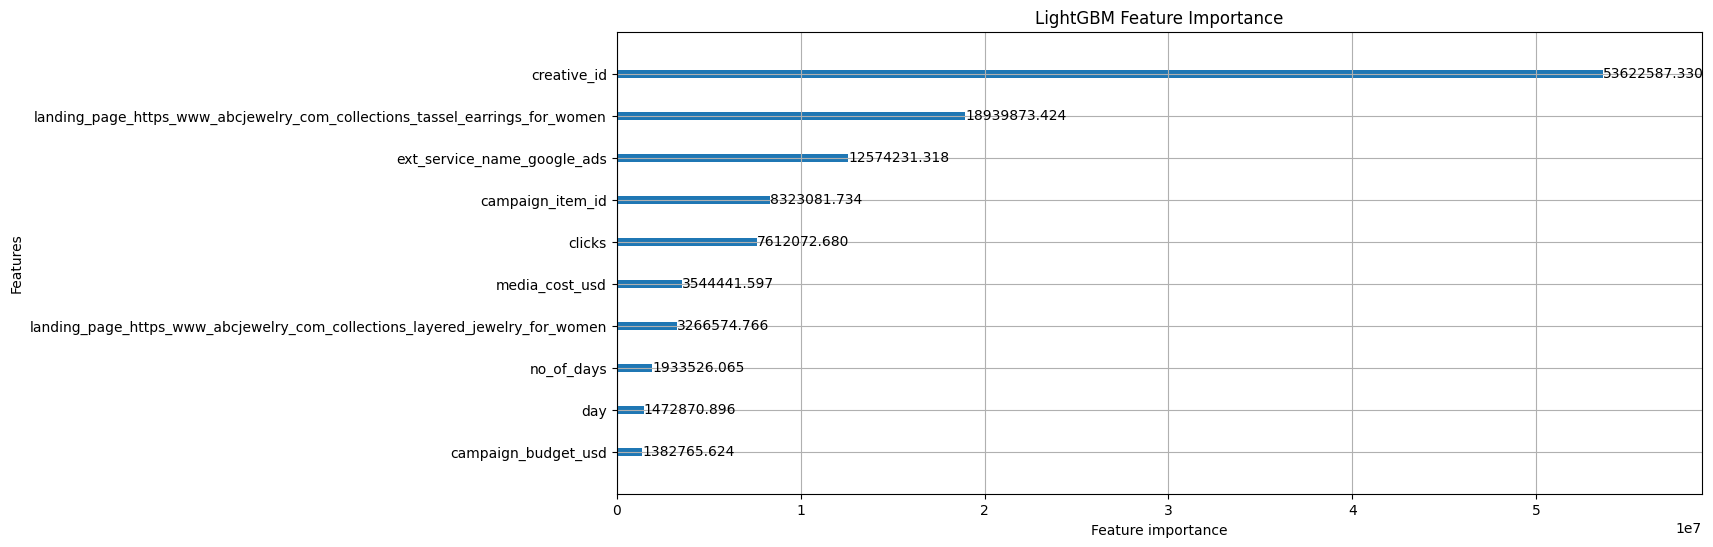

Training model on reduced feature set...
Making predictions...
Final Test ROC-AUC for LightGBM: 0.4705
Test Log Loss: 0.0911
Saving the trained model...


In [31]:
# Best hyperparameters identified earlier
best_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 1.0
}

# Step 1: Create the LightGBM model with the best hyperparameters
try:
    best_lgb_model = lgb.LGBMClassifier(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree']
    )

    # Step 2: Train the model on the training data
    print("Training LightGBM model...")
    best_lgb_model.fit(X_train, y_train_binary)

    # Step 3: Plot feature importance and select top features
    print("Plotting feature importance and selecting top features...")
    # Use 'gain' for feature importance
    lgb.plot_importance(best_lgb_model, importance_type='gain', max_num_features=10)
    plt.title("LightGBM Feature Importance")
    plt.show()

    # Get feature importances
    feature_importances = best_lgb_model.feature_importances_

    # Sort features by importance (descending order)
    important_features_idx = feature_importances.argsort()[-10:][::-1]  # Select top 10 important features

    # Create a reduced dataset using the most important features
    X_train_reduced = X_train.iloc[:, important_features_idx]
    X_test_reduced = X_test.iloc[:, important_features_idx]

    # Step 4: Train the model again on the reduced dataset
    print("Training model on reduced feature set...")
    best_lgb_model.fit(X_train_reduced, y_train_binary)

    # Step 5: Make predictions on the test data
    print("Making predictions...")
    y_pred_proba = best_lgb_model.predict_proba(X_test_reduced)[:, 1]  # Probability of class 1

    # Step 6: Calculate ROC-AUC and Log Loss
    roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
    logloss_test = log_loss(y_test_binary, y_pred_proba)

    print(f"Final Test ROC-AUC for LightGBM: {roc_auc:.4f}")
    print(f"Test Log Loss: {logloss_test:.4f}")

    # Step 7: Save the model for future use
    print("Saving the trained model...")
    joblib.dump(best_lgb_model, 'best_lgb_model_reduced.pkl')

except Exception as e:
    print(f"An error occurred: {e}")

Week 3 : Day 5 -> Refine and finalize the best-performing model.

Week 4 : Day 1 -> Setup a basic streamlit app for deployment

Week 4 : Day 2 -> Create a web interface for input and prediction display

Week 4 : Day 3 -> Connect the trained model to the web application

In [50]:
# Debugging Code Cell

# Verify Target Variable
print("CTR Statistics:")
print(df['CTR'].describe())

# Verify Data Preprocessing
print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

# Ensure no zero impressions
print("\nZero Impressions Count:")
print((df['impressions'] == 0).sum())

# Verify Data Splitting
X = df.drop(columns=['CTR'])
y = df['CTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

# Train a basic model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Check Predictions
y_pred = linear_model.predict(X_test)
print("\nPredictions (first 10):", y_pred[:10])

# Check if predictions are all zeros
print("\nAre all predictions zero?:", np.all(y_pred == 0))

# We get output that all predictions are not zero

CTR Statistics:
count    72612.000000
mean         0.017450
std          0.030918
min          0.000887
25%          0.009365
50%          0.013720
75%          0.018762
max          2.656117
Name: CTR, dtype: float64

Missing Values:
campaign_item_id                                                                           0
no_of_days                                                                                 0
ext_service_id                                                                             0
creative_id                                                                                0
creative_width                                                                             0
creative_height                                                                            0
template_id                                                                                0
advertiser_id                                                                              0
network_id           

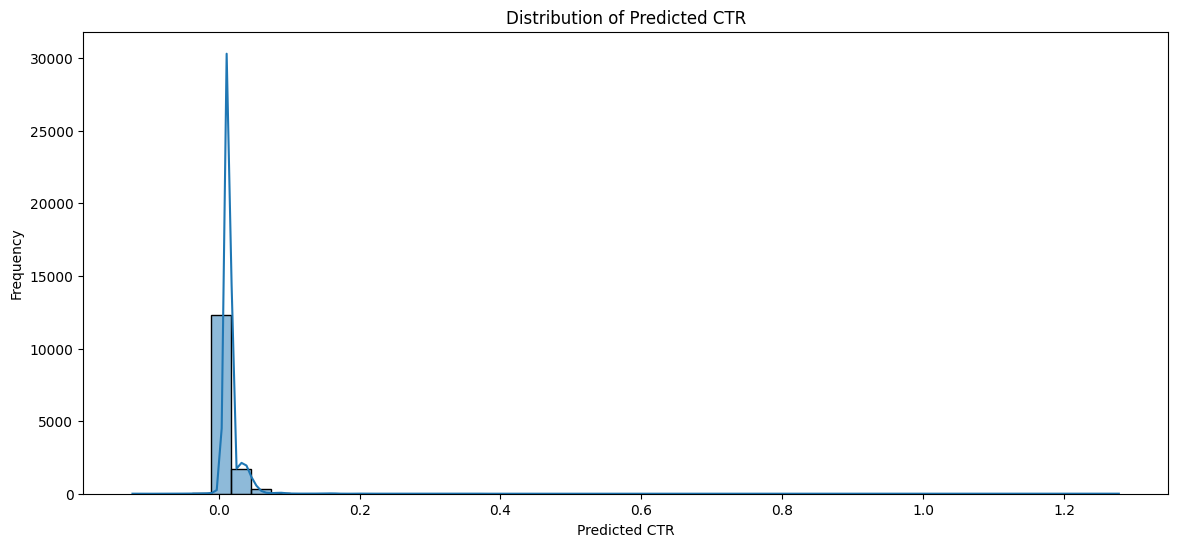

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of predicted CTR values
sns.histplot(y_pred, bins=50, kde=True)
plt.xlabel('Predicted CTR')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted CTR')
plt.show()

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahulchavan99/marketing-campaign-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.82M/1.82M [00:01<00:00, 1.15MB/s]


Extracting files...
Path to dataset files: C:\Users\Anubhav\.cache\kagglehub\datasets\rahulchavan99\marketing-campaign-dataset\versions\1


In [53]:
# Step 1: Install Streamlit, pyngrok, and matplotlib
!pip install streamlit pyngrok matplotlib scikit-learn

# Creating the streamlit application
app_code = """
import streamlit as st
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your trained model using joblib (LightGBM or XGBoost)
model = joblib.load('best_lgb_model_reduced.pkl')

# Define a threshold for CTR prediction
CTR_THRESHOLD = 0.0001  # Adjusted threshold for low CTR

# Function to preprocess and make predictions
def preprocess_and_predict(input_data):
    # Define the categorical features
    categorical_features = ['ext_service_name', 'search_tags', 'landing_page', 'advertiser_currency',
                            'channel_name', 'stats_currency', 'currency_code', 'search_tag_cat', 'timezone', 'weekday_cat']

    # Create DataFrame from input data
    input_df = pd.DataFrame([input_data], columns=categorical_features)

    # OneHotEncoder for categorical columns
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(input_df[categorical_features])

    # Assuming the model expects the encoded features
    input_data_processed = np.hstack([encoded_data])

    # Make the prediction using the trained model
    prediction = model.predict(input_data_processed)

    # Debug: Print the raw prediction
    st.write(f"Raw Prediction: {prediction[0]}")

    # Apply threshold: If CTR is lower than the threshold, set it to 0
    predicted_ctr = prediction[0] if prediction[0] >= CTR_THRESHOLD else 0.0

    return predicted_ctr

# Streamlit Interface
def main():
    st.title("Ad Click-Through Rate (CTR) Prediction")
    st.write("Enter the input features for ad prediction:")

    # Reduced input fields for 10 features
    ext_service_name = st.selectbox("External Service Name (ext_service_name)", ["Google Ads", "Facebook Ads", "DV360"])
    search_tags = st.text_input("Search Tags (search_tags)", "#fashion, #affordable_jewelry")
    landing_page = st.text_input("Landing Page URL (landing_page)", "https://www.abcjewelry.com/collections/affordable_jewelry_for_women")
    advertiser_currency = st.selectbox("Advertiser Currency (advertiser_currency)", ["USD", "EUR", "GBP"])
    channel_name = st.selectbox("Channel Name (channel_name)", ["Display Network", "Social Media", "Programmatic"])
    stats_currency = st.selectbox("Stats Currency (stats_currency)", ["USD", "EUR", "GBP"])
    currency_code = st.selectbox("Currency Code (currency_code)", ["USD", "EUR", "GBP"])
    search_tag_cat = st.selectbox("Search Tag Category (search_tag_cat)", ["Jewelry", "Fashion", "Necklaces", "Bracelets"])
    timezone = st.selectbox("Timezone (timezone)", ["America/New_York", "Europe/London", "Asia/Kolkata"])
    weekday_cat = st.selectbox("Weekday Category (weekday_cat)", ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

    # Create an input array (feature vector)
    input_data = [
        ext_service_name, search_tags, landing_page, advertiser_currency,
        channel_name, stats_currency, currency_code, search_tag_cat,
        timezone, weekday_cat
    ]

    # Button to trigger prediction
    if st.button("Predict CTR"):
        # Prediction
        ctr = preprocess_and_predict(input_data)
        st.write(f"Predicted Click-Through Rate (CTR): {ctr:.4f}")

# Run the Streamlit app
if __name__ == "__main__":
    main()
"""

# Save the Streamlit app code to a file
with open("app.py", "w") as f:
    f.write(app_code)

# Step 3: Set up ngrok to tunnel the Streamlit app and get the public URL
from pyngrok import ngrok

# Set up a tunnel to the Streamlit app on port 8501
!ngrok authtoken 2rWF74paIcS5dQpBq0BI6rfO862_2Z2EndgqXkBrDFJUVtsAR
public_url = ngrok.connect(addr='8501')
print('Streamlit app is live at:', public_url)

# Step 4: Run the Streamlit app in the background
!streamlit run app.py &

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app is live at: NgrokTunnel: "https://a343-34-82-195-131.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.2:8501
  External URL: http://34.82.195.131:8501

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  Stopping...
